## Modélisation d'épidémie

nous allons explorer ici, quelques façons de modéliser les épidémies, et tenter de comprendre quelqu'uns des mécanismes fondamentaux de ces modèles.

### Modélisation complètement homogène

une façon classique et simpliste de modéliser une épidémie est de la façon suivante. On va considérer deux types de populations : les personnes saines (S), et les personnes infectées (I). On cherche à comprendre l'évolution de ces deux quantités sous la dynamique suivante : 

  * une personne saine peut devenir infectée au contact d'une autre personne infectée, avec une probabilité $\beta$
  * une personne infectée peut devenir saine spontanément, avec une probabilité $\gamma$
  * la population totale est donnée par N(t) = S(t) + I(t)
  
on rajoutera aussi les ingrédients suivants (qui serviront par ailleurs à maintenir une population moyenne constante (N=S+I=constante)):

  * une personnes saine ou infectée a une probabilité $\delta$ de mourir
  * il y a un taux de natalité $\delta$ (donc de créer de nouvelles personnes saines)
  
Cela revient donc à modéliser le taux de croissance des personnes saines et infectées de la façon suivante:

$$
  \frac{dS}{dt} = - \frac{\beta}{N} S(t) I(t) + \delta N(t)  - \delta S(t) + \gamma I(t)
$$

$$
  \frac{dI}{dt} = \frac{\beta}{N(t)} S(t) I(t) - \gamma I(t) - \delta I(t)
$$

  1. Montrer que $\frac{dN}{dt}=0$. Qu'en conclure sur l'évolution de $N$ ?
  
  **Ici, on peut remarque que dI/dt = -dS/dt, donc dN/dt = dI/dt + dS/dt = 0**
  
  2. Trouver les deux solutions stationnaires au système ci-dessus (càd, un couple ($I$,$S$) tel que $\frac{dS}{dt} = 0$ et $\frac{dI}{dt} = 0$).
  
  **On trouve (S,I) = (N,0) et $(S,I) = (N-I,N/\beta \frac{1}{\beta-\delta-\gamma})$**
  
On veut étudier les propriétés de stabilité de la solution ($S$,$I$)$=(N,0)$. On va donc regarder le cas suivant: on imagine que le nombre de personnes infectées est petit au début $I=\epsilon$, et donc $S=N-\epsilon$. 

  3. En remplaçant $I$ par cette expression dans l'équation de l'évolution de $I$, qu'obtient-on si on néglige les termes qui deviennent d'ordre $\epsilon^2$ ou plus ?
  
  **on trouve que $\frac{d \epsilon}{dt} = \epsilon (\beta - \delta - \gamma)$**
  
  
  4. En déduire ce qu'il se passe si la quantité $\mathcal{R}_0 = \frac{\beta}{\delta + \gamma}$ est plus grande ou plus petite que un.
  
  **d'après l'équation précédente, si $\beta-\delta-\gamma<0$ on va converger vers $I=0$, sinon on va croître exponentiellement. On peut donc utiliser : $\mathcal{R}_0 = \frac{\beta}{\gamma + \delta} <1$ ou $>1$ comme indicateur**
  
  5. Vérifier que la fonction 
  
  $$
  f(t) = \frac{N(\beta - \delta - \gamma)}{\beta} \frac{1}{1+ (\frac{N(\beta - \delta - \gamma)}{\beta I_0} - 1) e^{-(\beta - \delta - \gamma)t}}
  $$
  
  est bien la solution de l'équation différentielle pour $I$.
  
  6. Prendre $\beta=0.5$, $\gamma=0.1$, $\delta=0.2$, $N=1000$ et $I_0/N$ = 0.05, et tracer la fonction. Qu'observe-t-on ?
  
  **il suffit de remplacer**
  
  7. Que se passe-t-il si maintenant $\gamma=0.3$ et $\delta=0.3$ ?
  8. Que conclure en fonction du signe de $\beta - \delta - \gamma$ ?

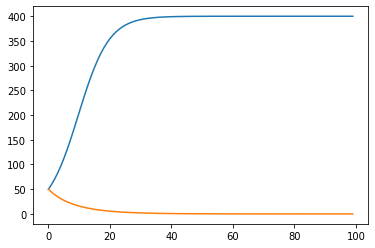

In [3]:
import numpy as np
import matplotlib.pyplot as plt

xr = np.arange(0,100)
def myI(x,β,δ,γ,N,I0):
    c = β-δ-γ
    a = N*c/β 
    return a / (1+ (a/I0-1)*np.exp(-c*x))


plt.plot(xr,myI(xr,0.5,0.2,0.1,1000,50)) # cas 6
plt.plot(xr,myI(xr,0.5,0.3,0.3,1000,50)) # cas 7

On voit dans le cas 6. que l'épidémie atteint un régime permanent car R0>1. Dans le cas 7. au  contraire, l'épidémie ne peut pas se développer, on a R0<1.

### (bonus)  Modélisation SIR

On peut raffiner le modèle et considérer maintenant trois types de personnes : les saines (S), les infectées (I) et celles qui se ne sont plus infectées et immunisées (R).
Dans ce cas là, on va reprendre les éléments du modèle précédent avec les changements suivants

  * le taux de mortalité des S,I,R sera repectivement $\delta$
  * le taux de natalité $\Lambda=\delta$
  * on passera de I à R avec un taux $\gamma$
  
  
  1. Ecrire les equations d'évolution pour $S$, $I$ et $R$. Vous vérifierez que $\frac{dN}{dt} = 0$.
  
  **Eqs du SIR**
  $$
    \frac{dS}{dt} = -\frac{\beta}{N}S I + \delta N - \delta S
  $$
  $$
    \frac{dI}{dt} = \frac{\beta}{N}S I - \delta I - \gamma I
  $$
  $$
    \frac{dR}{dt} = -\delta R + \gamma I
  $$
  
  2. Calculer $\mathcal{R}_0$ pour le cas présent
  
  **Valeur du R0: $\mathcal{R}_0 = \frac{\beta}{\gamma + \delta}$**
  
  
  3. Résoudre les équations différentielles numériquement et observer le comportement pour 
    * $\beta=0.5$, $\gamma=0.1$ et $\delta=0$
    * $\beta=0.5$, $\gamma=0.7$ et $\delta=0$

In [10]:
# on définit la fonction qui renvoie la valeur des termes de droites des eqs différentielles
def SIR(y, t, δ, β, γ, N):
    S, I, R = y
    dydt = [-β*S*I/N + δ*N - δ*S, β*S*I/N - δ*I - γ*I, -δ*R + γ*I]
    return dydt

In [15]:
# On définit la valeur de paramètres et les conditions initiales
# paramètres
β0=0.5
γ0=0.1
δ0=0
N = 1000
# conditions initiales
y0 = [N-50,50,0]
# pour t allant de 0 à 40, 1000 points régulièrement espacés
t = np.linspace(0, 40, 1001)

In [16]:
# Résolution
from scipy.integrate import odeint
sol = odeint(SIR, y0, t, args=(δ0, β0, γ0, N))

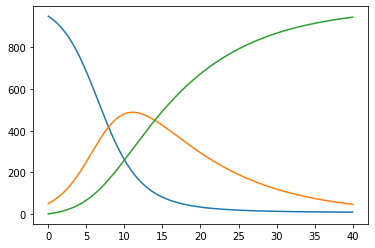

In [17]:
# On afficher la solution
plt.plot(t, sol[:, 0], label='S(t)')
plt.plot(t, sol[:, 1], label='I(t)')
plt.plot(t, sol[:, 2], label='R(t)')

In [18]:
# On définit la valeur de paramètres et les conditions initiales
# paramètres
β0=0.5
γ0=0.7
δ0=0
N = 1000
# conditions initiales
y0 = [N-50,50,0]
# pour t allant de 0 à 40, 1000 points régulièrement espacés
t = np.linspace(0, 40, 1001)

In [19]:
sol = odeint(SIR, y0, t, args=(δ0, β0, γ0, N))

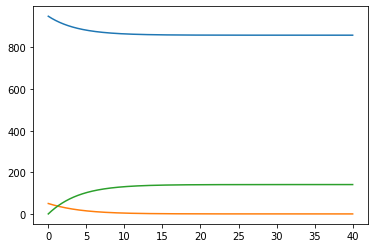

In [20]:
# On afficher la solution
plt.plot(t, sol[:, 0], label='S(t)')
plt.plot(t, sol[:, 1], label='I(t)')
plt.plot(t, sol[:, 2], label='R(t)')

### Exemple de résolution du cas SIS:

In [2]:
# on définit la fonction qui renvoie la valeur des termes de droites des eqs différentielles
def SIS(y, t, δ, β, γ, N):
    S, I = y
    dydt = [-β*S*I/N + δ*N - δ*S + γ*I, β*S*I/N - δ*I - γ*I]
    return dydt

In [3]:
# On définit la valeur de paramètres et les conditions initiales
# paramètres
β0=0.5
γ0=0.1
δ0=0.2
N = 1000
# conditions initiales
y0 = [N-50,50]
# pour t allant de 0 à 40, 1000 points régulièrement espacés
t = np.linspace(0, 40, 1001)

In [4]:
# Résolution
from scipy.integrate import odeint
sol = odeint(SIS, y0, t, args=(δ0, β0, γ0, N))

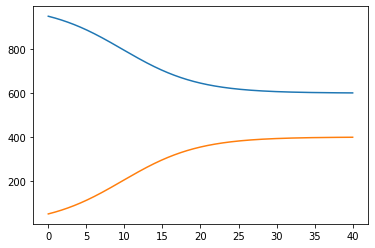

In [5]:
# On afficher la solution
plt.plot(t, sol[:, 0], label='S(t)')
plt.plot(t, sol[:, 1], label='I(t)')

## Modélisation d'épidémie : sur un graph

on peut changer l'hypothèse initiale (système parfaitement homogène et mélangé) en le transposant sur un problème d'épidémie sur un graphe.

L'idée est la suivante : un graphe est composé de noeuds et de liens. Chaque noeud ici représente une personne et chaque lien un contact social. On va regarder la variant SIR du probleme ici, on aura donc au début pratiquement toutes les personnes (tous les noeuds donc) dans l'état S, et quelques noeud infectés. Chaque noeud infecté pourra contaminer uniquement ses voisins (les autres noeuds qui sont reliés à lui par un lien) avec une certaine probabilité ($\beta$ toujours). Chaque noeud infecté pourra également guérir spontanément et devenir immunisé (R, pour récupérer), ceci avec une probabilité $\gamma$ par unité de temps. On va donc implémentez la dynamique de la façon suivante

A chaque itération:
  * on passera en revu tous les noeuds infectés (dans un ordre aléatoire)
  * pour chaque noeud infecté, celui-ci contaminera ses voisins avec la probabilité $\beta$
  * une fois tous les voisins passé en revu, celui-ci pourra guérir spontanément avec une probabilité $\gamma$.
  
Votre travail : implémenter la propagation d'épidémie sur le graphe et observer les résultats sur un graphe de taille $N=1000$ et $d=6$.
  1. pour $\beta = 0.6$, $\gamma=0.2$ et en prenant une fraction de $5\%$ de noeuds infectés au début. Afficher le nombre de S,I et R en fonction du numéro de l'itération.
  2. garder le paramètre $\gamma=0.2$, et faire varier $\beta$ de $0$ à $1$. Pour chaque valeur de $\beta$ vous enregistrerez la valeur maximale du nombre d'infectés. Vous afficherez ensuite sur un graph, la proportion maximum de noeuds infecté en fonction de $\beta$.
  
  

**BONUS:**

on peut mettre en place des mesure de distanciation sociale de la façon suivante : on restraint le nombre de voisins à $20\%$ de façon aléatoire (en gros, on supprime au hasard $80\%$ des liens. Essayer d'implémenter l'expérience suivante : appliquer cette mesure de distanciation pour $20$ itérations et ensuite, retirer la pour la suite de la simulation. Tracer les courbes $S(t)$, $I(t)$ et $R(t)$. Qu'observez-vous ?

### Manipulation des graphes

pour vous aider, voici comment manipuler les graphes à l'aide de la bibliothèque networkx:

In [23]:
import networkx as nx
nb_nodes = 1000 # nombre de noeuds
inf_graph = nx.random_regular_graph(6,nb_nodes) # on créer un graph de nb_nodes noeuds où chaque noeud à 6 voisins

In [24]:
α = 0.05 # proportion of infected at t=0
β = 0.6
γ = 0.2

In [25]:
state_node = np.zeros(nb_nodes)
inf_nodes = np.random.choice(np.arange(nb_nodes),int(α*nb_nodes))
state_node[inf_nodes] = 1

In [26]:
tmax=40;

state_node = np.zeros(nb_nodes)
inf_nodes = np.random.choice(np.arange(nb_nodes),int(α*nb_nodes))
state_node[inf_nodes] = 1

dens_sain = np.zeros(1)
dens_inf = np.zeros(1)
dens_rec = np.zeros(1)

dens_sain[0] = np.where(state_node==0)[0].shape[0]/nb_nodes
dens_inf[0] = np.where(state_node==1)[0].shape[0]/nb_nodes
dens_rec[0] = np.where(state_node==2)[0].shape[0]/nb_nodes



for t in range(tmax):
    #print(np.where(state_node==0)[0].shape[0])
    inf_nodes = np.where(state_node==1)[0]
    diff_sain = 0
    diff_inf = 0
    diff_rec = 0
    for n in inf_nodes:
        for neigh in nx.neighbors(inf_graph,n):

            #print(n," ",neigh," ",state_node[neigh])
            if(state_node[neigh]==0)&(np.random.random()<β):            
                #print(n," ",neigh," ",state_node[neigh])
                state_node[neigh]=1
                #print(n," ",neigh," ",state_node[neigh])
                diff_sain  -= 1
                diff_inf += 1
                #dens_sain = np.append(dens_sain,dens_sain[-1]-1/nb_nodes)                
                #dens_inf = np.append(dens_inf,dens_inf[-1]+1/nb_nodes)

        if(np.random.random()<γ):
            diff_inf -= 1    
            diff_rec += 1
            state_node[n] = 2

    dens_sain = np.append(dens_sain,dens_sain[-1]+diff_sain/nb_nodes)
    dens_inf = np.append(dens_inf,dens_inf[-1]+diff_inf/nb_nodes)
    dens_rec = np.append(dens_rec,dens_rec[-1]+diff_rec/nb_nodes)
    #print(dens_sain[-1]," ",diff_sain)
    #print(np.where(state_node==0)[0].shape[0]/nb_nodes)

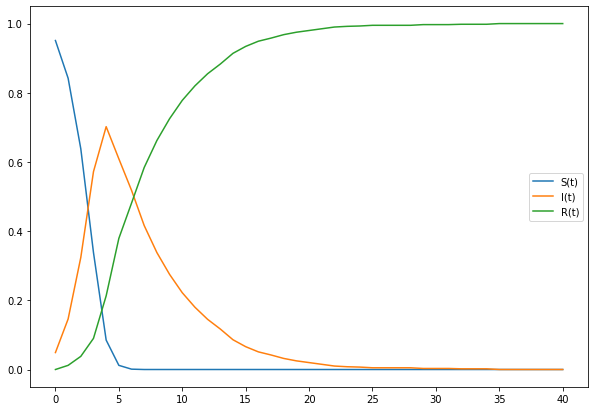

In [30]:
f = plt.figure(figsize=(10,7))

plt.plot(dens_sain,label="S(t)")
plt.plot(dens_inf,label="I(t)")
plt.plot(dens_rec,label="R(t)")
plt.legend()
plt.show()

In [33]:
state_node = np.zeros(nb_nodes)
inf_nodes = np.random.choice(np.arange(nb_nodes),int(α*nb_nodes))
state_node[inf_nodes] = 1

tmax=40;
max_I = np.array([])
all_β = np.arange(0.01,1.0,0.01)
for β in all_β:
    
    state_node = np.zeros(nb_nodes)
    inf_nodes = np.random.choice(np.arange(nb_nodes),int(α*nb_nodes))
    state_node[inf_nodes] = 1
    
    dens_sain = np.zeros(1)
    dens_inf = np.zeros(1)
    dens_rec = np.zeros(1)

    dens_sain[0] = np.where(state_node==0)[0].shape[0]/nb_nodes
    dens_inf[0] = np.where(state_node==1)[0].shape[0]/nb_nodes
    dens_rec[0] = np.where(state_node==2)[0].shape[0]/nb_nodes



    for t in range(tmax):
        #print(np.where(state_node==0)[0].shape[0])
        inf_nodes = np.where(state_node==1)[0]
        diff_sain = 0
        diff_inf = 0
        diff_rec = 0
        for n in inf_nodes:
            for neigh in nx.neighbors(inf_graph,n):

                #print(n," ",neigh," ",state_node[neigh])
                if(state_node[neigh]==0)&(np.random.random()<β):            
                    #print(n," ",neigh," ",state_node[neigh])
                    state_node[neigh]=1
                    #print(n," ",neigh," ",state_node[neigh])
                    diff_sain  -= 1
                    diff_inf += 1
                    #dens_sain = np.append(dens_sain,dens_sain[-1]-1/nb_nodes)                
                    #dens_inf = np.append(dens_inf,dens_inf[-1]+1/nb_nodes)

            if(np.random.random()<γ):
                diff_inf -= 1    
                diff_rec += 1
                state_node[n] = 2

        dens_sain = np.append(dens_sain,dens_sain[-1]+diff_sain/nb_nodes)
        dens_inf = np.append(dens_inf,dens_inf[-1]+diff_inf/nb_nodes)
        dens_rec = np.append(dens_rec,dens_rec[-1]+diff_rec/nb_nodes)
        #print(dens_sain[-1]," ",diff_sain)
        #print(np.where(state_node==0)[0].shape[0]/nb_nodes)
    max_I = np.append(max_I,np.max(dens_inf))

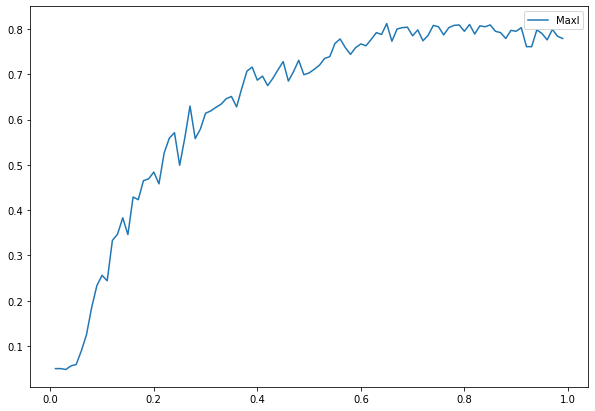

In [36]:
f = plt.figure(figsize=(10,7))
plt.plot(all_β,max_I,label="MaxI")
plt.legend()